# Stage 08: Exploratory Data Analysis (EDA)

This notebook performs **Exploratory Data Analysis (EDA)** on a synthetic dataset.  
The dataset simulates customer demographics and spending behavior, and the analysis follows the structure required in the assignment:

1. **Statistical summaries**: `.info()`, `.describe()`, missing values  
2. **Distributional plots**: histograms and boxplots  
3. **Bivariate visuals**: scatter plots for key relationships  
4. **Correlation heatmap** (optional)  
5. **Markdown commentary**: insights, assumptions, and next steps  

The goal of this stage is to **understand data quality, distributions, and relationships** in order to prepare for data cleaning and feature engineering.

In [2]:
# === Stage 08 EDA — Setup & Synthetic Data ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

sns.set(context="talk", style="whitegrid")
np.random.seed(8)
pd.set_option("display.max_columns", 100)

# --- Synthetic dataset (adapt or replace with real data later) ---
n = 160
df = pd.DataFrame({
    "date": pd.date_range("2021-02-01", periods=n, freq="D"),
    "region": np.random.choice(["North","South","East","West"], size=n),
    "age": np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    "income": np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    "transactions": np.random.poisson(lam=3, size=n),
})

base = df["income"] * 0.0015 + df["transactions"] * 18 + np.random.normal(0, 40, size=n)
df["spend"] = np.maximum(0, base).round(2)

# Inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), "income"] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), "spend"] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), "transactions"] = df["transactions"].max() + 12

df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [3]:
# === Step 1: First Look ===
df.info()

print("\nMissing values per column:")
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB

Missing values per column:
date            0
region          0
age             0
income          5
transactions    0
spend           3
dtype: int64


## 2) Numeric profile

In [4]:
# === Step 2: Numeric Profile ===
desc = df[['age','income','transactions','spend']].describe().T

# Add skewness and kurtosis for each column
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]

desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

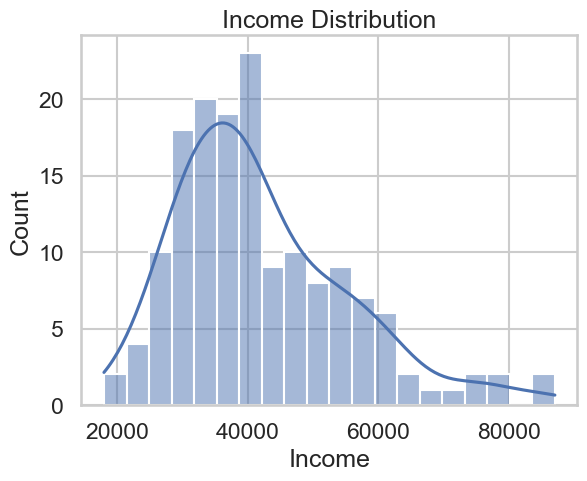

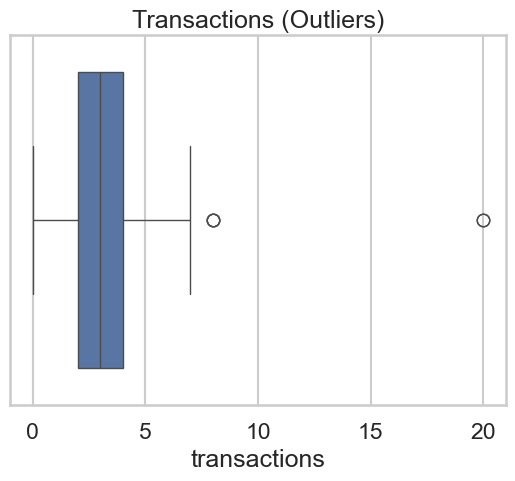

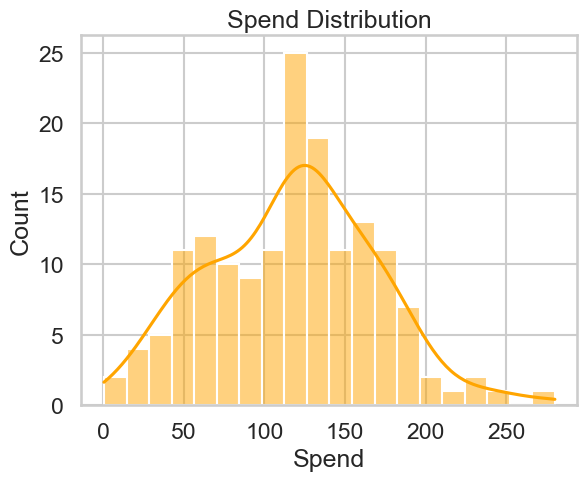

In [5]:
# === Step 3: Distributions ===

# 1. Histogram + KDE for income
sns.histplot(df['income'], kde=True, bins=20)
plt.title("Income Distribution")
plt.xlabel("Income")
plt.show()

# 2. Boxplot for transactions (outliers check)
sns.boxplot(x=df['transactions'])
plt.title("Transactions (Outliers)")
plt.show()

# 3. Histogram for spend
sns.histplot(df['spend'], kde=True, bins=20, color="orange")
plt.title("Spend Distribution")
plt.xlabel("Spend")
plt.show()

## 4) Relationships (TODO: add at least 2)

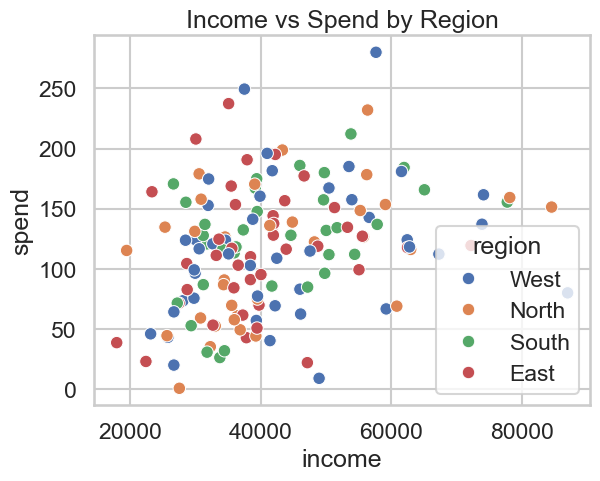

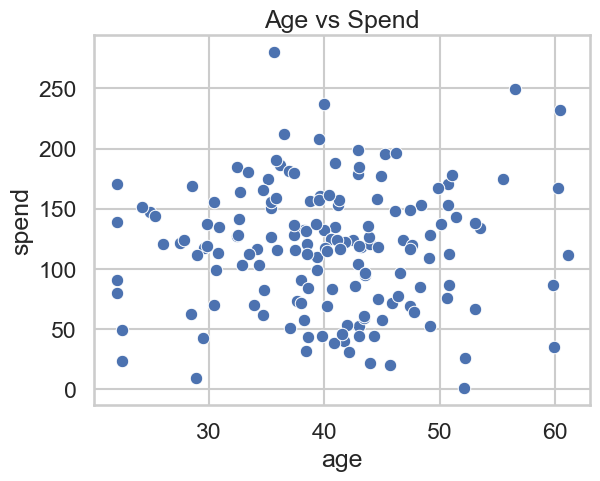

In [6]:
# === Step 4: Relationships ===

# Income vs Spend, colored by region
sns.scatterplot(data=df, x="income", y="spend", hue="region")
plt.title("Income vs Spend by Region")
plt.show()

# Age vs Spend
sns.scatterplot(data=df, x="age", y="spend")
plt.title("Age vs Spend")
plt.show()

## 5) (Optional) Correlation matrix

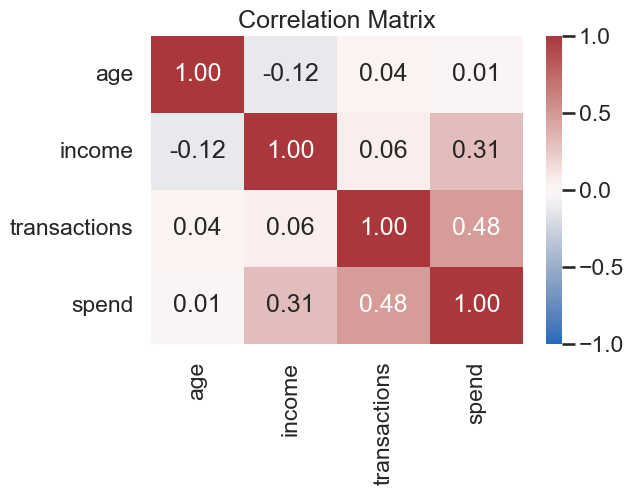

In [7]:
# === Step 5: Correlation Heatmap (Optional) ===
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

## 6) Insights & Assumptions

### Top 3 Insights
1. **Income distribution** is positively skewed, with some very high earners (outliers).  
2. **Spend** is moderately correlated with both income and transactions, but not strongly with age.  
3. There are a few **outliers in transactions** (extremely high counts), which could distort models.

### Assumptions & Risks
- The dataset is synthetic and may not fully capture real-world variability.  
- Outliers might represent true high-value customers rather than errors.  
- Missing values appear in income and spend — assumptions about how to impute them could affect results.

### Next Steps Before Modeling
- **Handle missing values**: impute with mean/median, or drop depending on context.  
- **Address outliers**: cap extreme transaction values or use robust models.  
- **Feature engineering**: consider new features like “spend per transaction” or regional aggregates.  